<a href="https://colab.research.google.com/github/Jnyambok/Daily-Dose-of-Data-Science/blob/main/DailyDoseOfDataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Comparison of Polars vs Pandas**


Pandas is an essential library in almost all Data Science projects.

But it has many limitations.

For instance, Pandas:

    always adheres to single-core computation

    offers no lazy execution

    creates bulky DataFrames

    is slow on large datasets, and many more

Polars is a lightning-fast DataFrame library that addresses these limitations.

It provides two APIs:

    Eager: Executed instantly, like Pandas.

    Lazy: Executed only when one needs the results.

The visual presents the syntax comparison of Polars and Pandas for various operations.

It is clear that Polars API is extremely similar to Pandas'.

Thus, contrary to common belief, the transition from Pandas to Polars is not that intimidating and tedious.

If you know Pandas, you (mostly) know Polars.

In most cases, the transition will require minimal code updates.

But you get to experience immense speed-ups, which you don't get with Pandas.

I recently did a comprehensive benchmarking of Pandas and Polars, which you can read here: Pandas vs Polars — Run-time and Memory Comparison.

In [ ]:
import pandas as pd
import polars as pl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from datetime import datetime
start_time = datetime.now()
pl_df = pl.read_csv('/content/drive/MyDrive/2024_projects/data/epl_data.csv')
end_time = datetime.now()
print('Duration for Polars: {}'.format(end_time - start_time))

Duration for Polars: 0:00:00.563419


In [ ]:
from datetime import datetime
start_time = datetime.now()
pl_df = pd.read_csv('/content/drive/MyDrive/2024_projects/data/epl_data.csv')
end_time = datetime.now()
print('Duration for Pandas: {}'.format(end_time - start_time))

Duration for Pandas: 0:00:00.029085


# **2. Decision Trees ALWAYS Overfit! Here's a Neat Technique to Prevent It**


By default, a decision tree is usually left to grow until it is pure because a standard decision tree algorithm greedily selects the best split at each node.
This makes the node purer and purer as we go

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [ ]:
import seaborn as sns
sns.set()


In [ ]:
#Generate some synthetic data to train the DT
X,y = make_classification (
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0
)

#Split the data into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#Build a decision tree using the default configuration
tree_a = DecisionTreeClassifier(random_state=0)
tree_a.fit(X_train, y_train)


#Evaluate the performance
train_score = tree_a.score(X_train,y_train)
roc_auc = roc_auc_score(y_test,tree_a.predict_proba(X_test)[:,1])

print(train_score, roc_auc)



1.0 0.8619028502609394


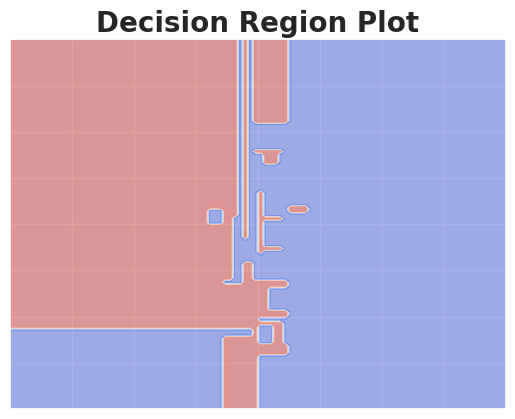

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


xx, yy = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
Z = tree_a.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots()
plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm_r')
ax.set_title("Decision Region Plot", fontsize = 20, fontweight = "bold")
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()


Cost-complexity-pruning (CCP) is an effective technique to prevent this.

CCP considers a combination of two factors for pruning a decision tree:

    Cost (C): Number of misclassifications

    Complexity (C): Number of nodes

The core idea is to iteratively drop sub-trees, which, after removal, lead to:

    a minimal increase in classification cost

    a maximum reduction of complexity (or nodes)

In sklearn, you can control cost-complexity-pruning using the ccp_alpha parameter:

  large value of ccp_alpha → results in underfitting

  small value of ccp_alpha → results in overfitting

The objective is to determine the optimal value of ccp_alpha, which gives a better model.

In [ ]:
# Build a second decision tree, this time using a non-zero value for ccp_alpha
tree_b = DecisionTreeClassifier(ccp_alpha=0.007, random_state=0)
tree_b.fit(X_train, y_train)

# Evaluate the performance of the second decision tree on the training data
train_score = tree_b.score(X_train, y_train)
roc_auc = roc_auc_score(y_test, tree_b.predict_proba(X_test)[:,1])
print(train_score, roc_auc)

0.90625 0.9493175431553593


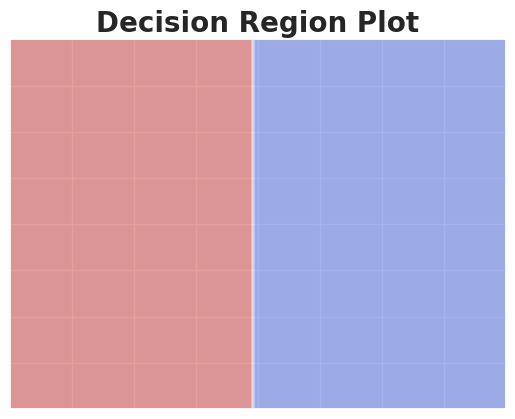

In [ ]:
xx, yy = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
Z = tree_b.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots()
plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm_r')
ax.set_title("Decision Region Plot", fontsize = 20, fontweight = "bold")
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()


# **3. Evaluate Clustering Performance Without Ground Truth Labels**



In the absence of ground truth labels, evaluating clustering performance is difficult.
Yet, there are a few performance metrics that can help.
Using them, you can compare multiple clustering results, say, those obtained with a different number of centroids.
This is especially useful for high-dimensional datasets, as visual evaluation is difficult.

The evaluation metrics you can use:

1.   **Silhoute Coeffecient** -
 Measures how similar a data point is to its own cluster compared to other clusters. A higher score indicates better-defined clusters.
 for every point, find average distance to all other points within its cluster
(A), for every point, find average distance to all points in the nearest cluster (B), score for a point is (B-A)/max(B, A),compute the average of all individual scores to get the overall clustering score,computed on all samples, thus, it's computationally expensivea higher score indicates better and well-separated clusters
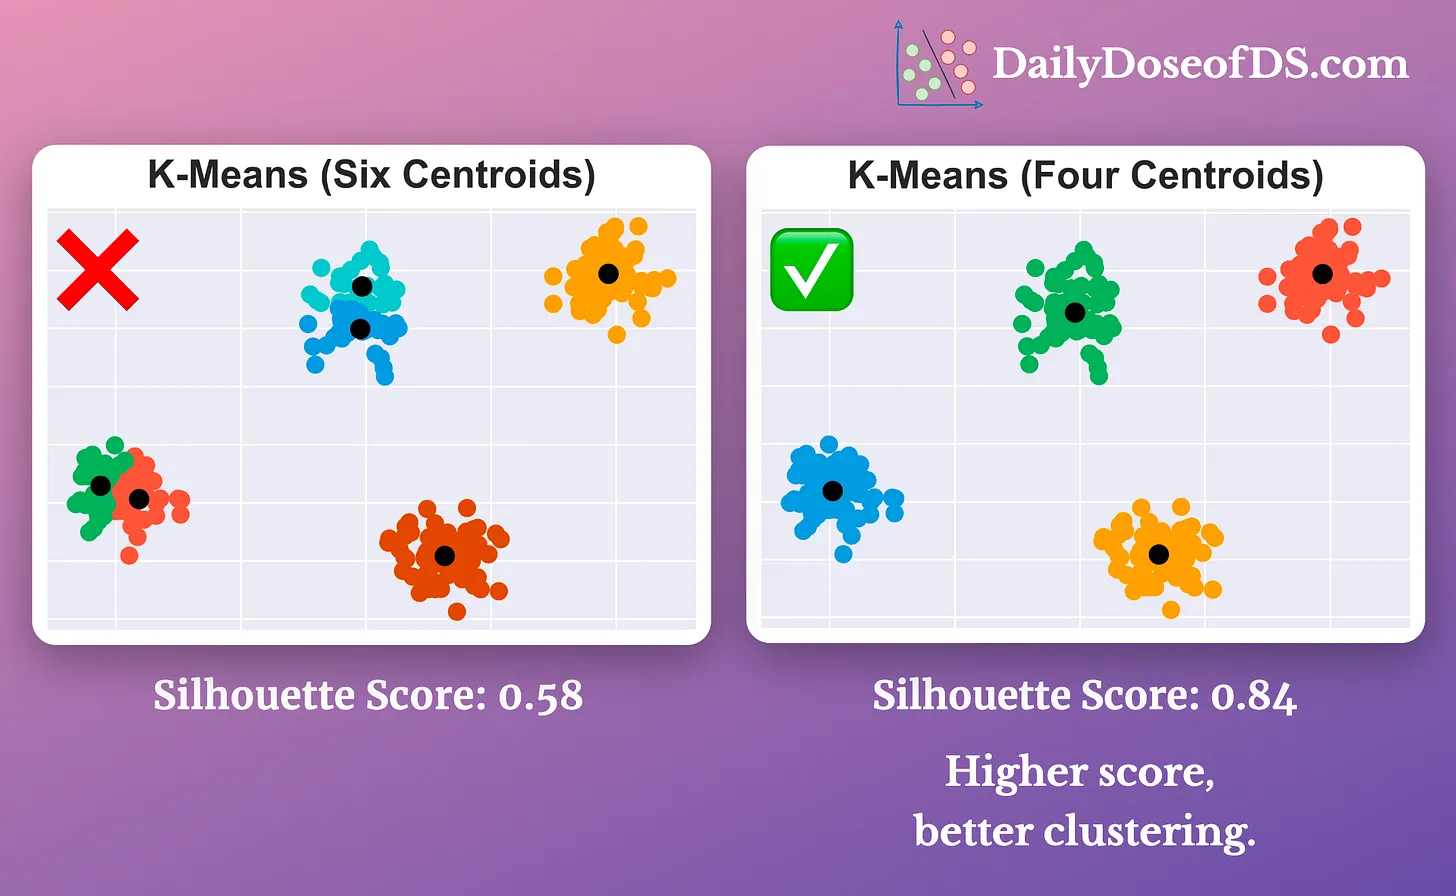
2.   **Calinski-Harabasz Index**  -
Measures the average similarity between each cluster and its most similar cluster. A lower score indicates better separation between clusters

A: sum of squared distance between all centroids and overall dataset center
B: sum of squared distance between all points and their specific centroid
metric is computed as A/B (with an additional scaling factor)relatively faster to compute
it is sensitive to scale
a higher score indicates well-separated clusters

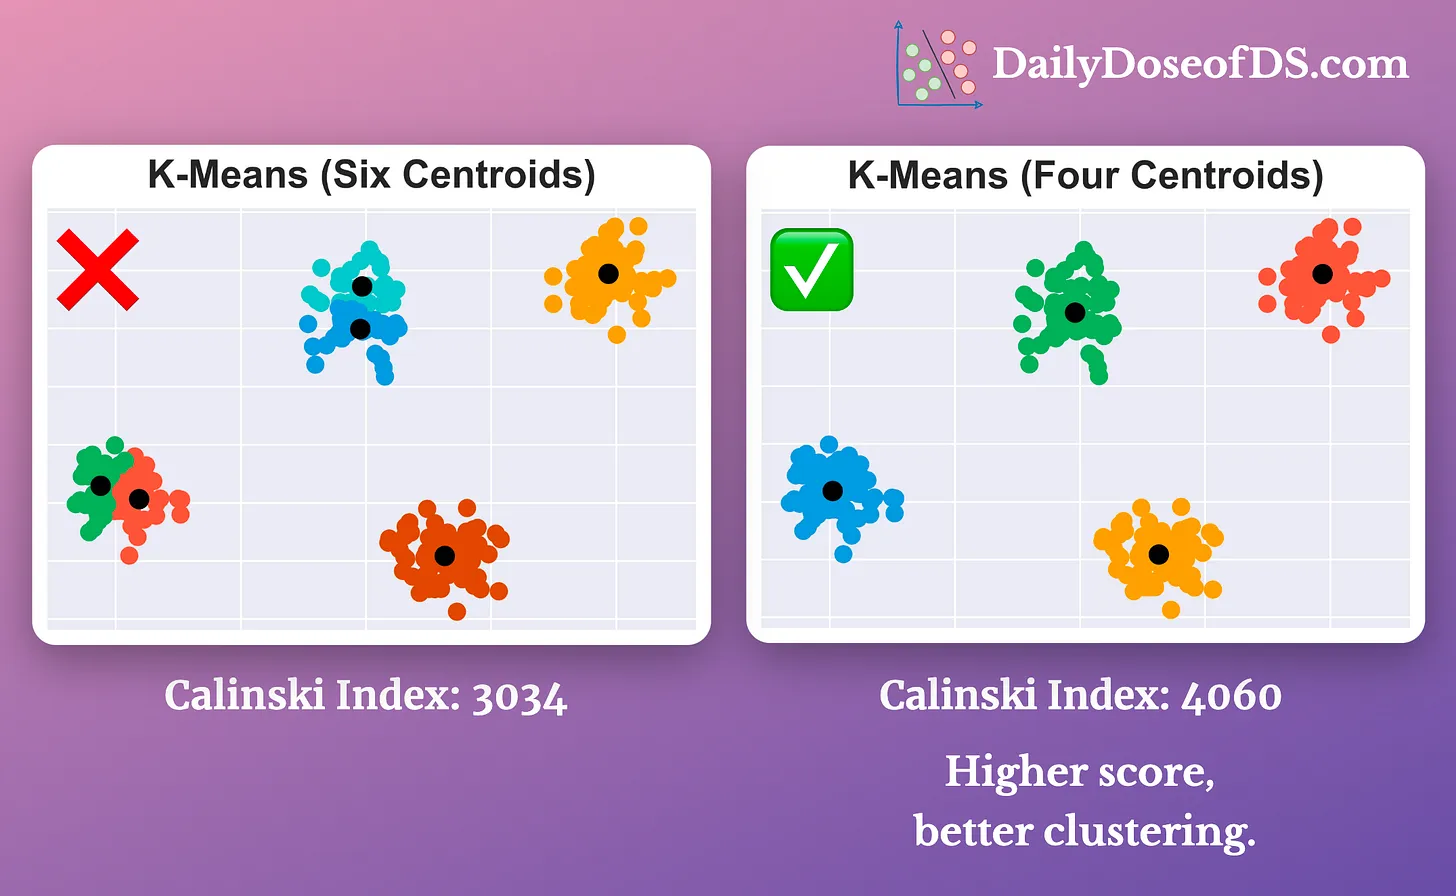

3. **Davies-Bouldin Index**
  Measures the ratio of between-cluster variance to within-cluster variance. A higher score indicates better-defined clusters
  measures the similarity between clusters
  thus, a lower score indicates dissimilarity and better clustering
  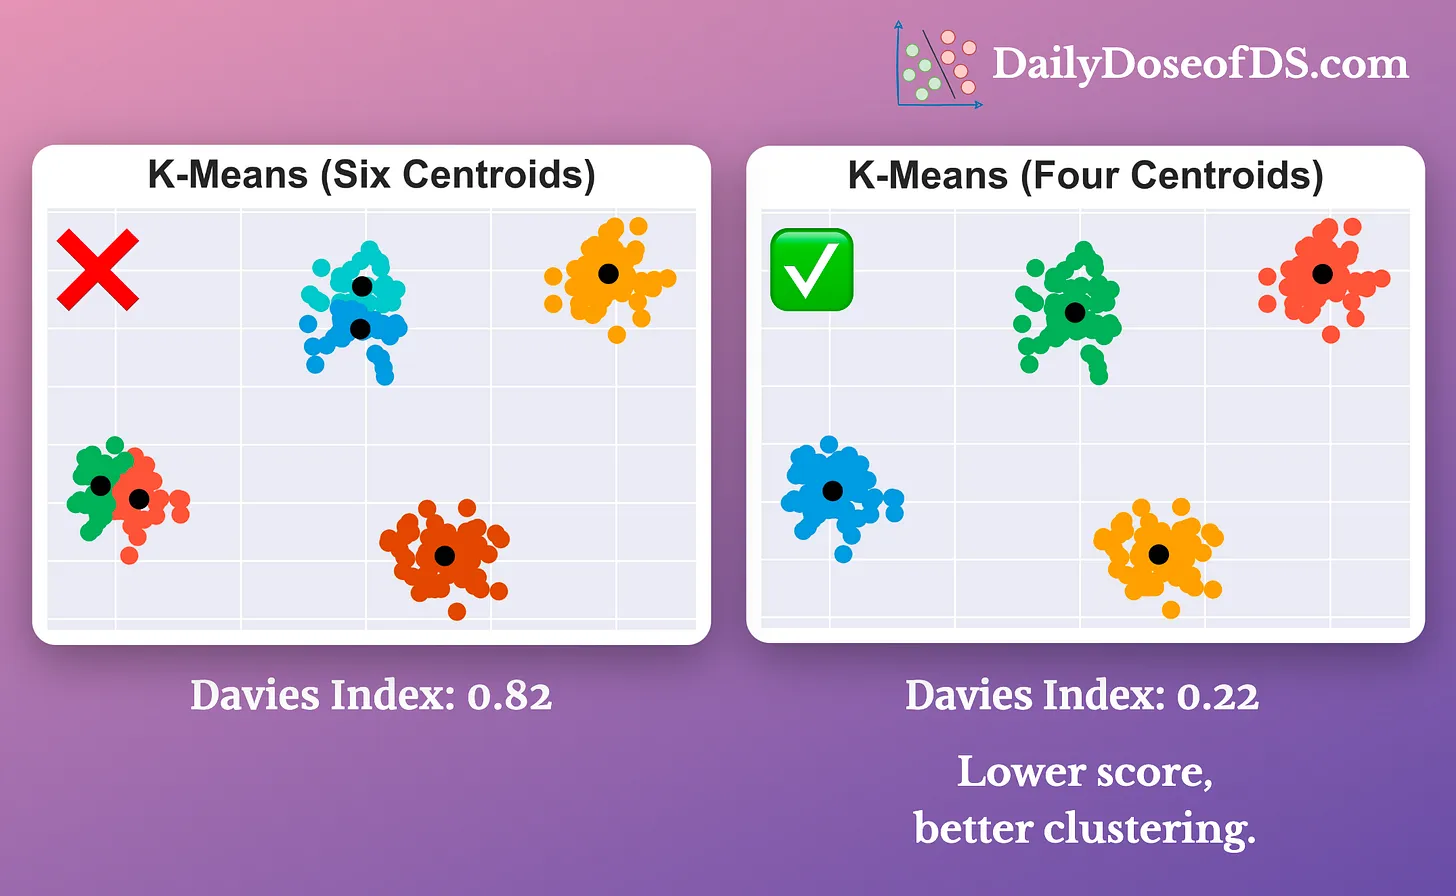




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

import seaborn as sns
sns.set()

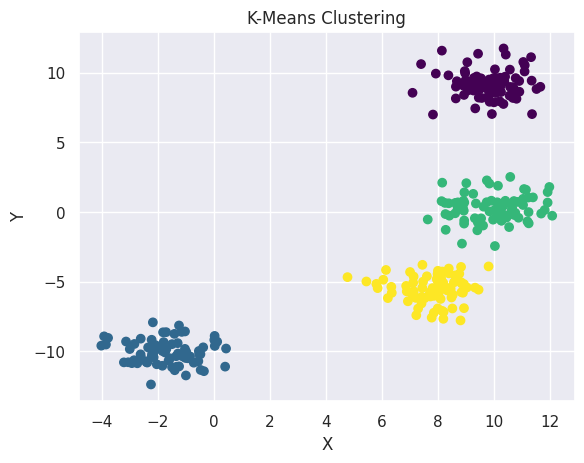

In [ ]:
X, y = make_blobs ( n_samples = 300, centers = 4, n_features=2)


# Generate 2D blobs dataset with three centroids
X, y_true = make_blobs(n_samples=300, centers=4, n_features=2)

plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()



In [ ]:
colors = ['#fe7c73', '#2471A3', '#3498DB', '#27AE60', '#82E0AA', '#D35400', '#5D6D7E', '#E74C3C', '#21618C', '#B7950B', '#46C7C7', '#00B9FF', '#FF7051', "orange", "darkorange", "tomato", "coral", "limegreen", "lightsalmon"]

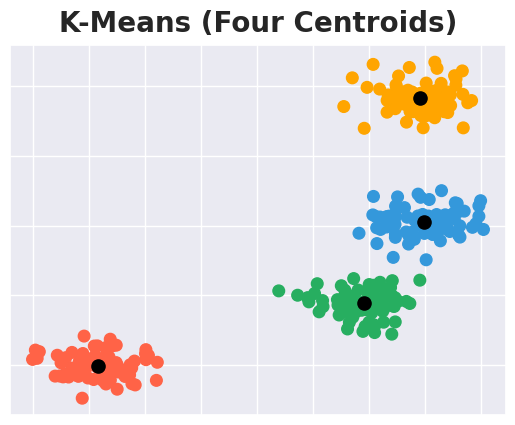

Silhouette Coefficient: 0.7676856135660678
Calinski-Harabasz Index: 3861.6524284527436
Davies-Bouldin Index: 0.3274633964594875


In [ ]:
kmeans = KMeans (n_clusters=4)
y_pred = kmeans.fit_predict(X)


filtered = [colors[13], colors[15], colors[2], colors[3]]
fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=[filtered[i] for i in y_pred], s = 70)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 90, c="black", marker='o', label='Centroids')
ax.set_title('K-Means (Four Centroids)', fontsize = 20, weight="bold", pad = 10)

ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()


# Compute Silhouette Coefficient
silhouette_coefficient = silhouette_score(X, y_pred)

# Compute Calinski-Harabasz Index
calinski_harabasz_index = calinski_harabasz_score(X, y_pred)

# Compute Davies-Bouldin Index
davies_bouldin_index = davies_bouldin_score(X, y_pred)

# Print the evaluation metrics
print("Silhouette Coefficient:", silhouette_coefficient)
print("Calinski-Harabasz Index:", calinski_harabasz_index)
print("Davies-Bouldin Index:", davies_bouldin_index)

# **4. The Most Common Misconception About Continuous Probability Distributions**



The PDF (Probability Density Function) and CDF (Cumulative Distribution Function) are both essential concepts in probability and statistics, used to describe the distribution of a random variable. Here's a breakdown of their differences:

**Probability Density Function** (PDF)

  Definition: For a continuous random variable, the PDF is a function that describes the relative likelihood of the variable taking on a given value.  

Interpretation: The value of the PDF at a particular point doesn't give the probability of the variable being exactly equal to that point (which is zero for continuous variables). Instead, the PDF is used to calculate probabilities over intervals. The probability of the variable falling within a specific interval is given by the area under the PDF curve over that interval.  
Properties:

1. Non-negative: The PDF is always greater than or equal to zero.
2. Integrates to 1: The total area under the PDF curve is equal to 1.  

3. Visualization: The PDF is typically visualized as a curve. The higher the curve at a particular point, the more likely the variable is to take on values near that point.  

**Cumulative Distribution Function** (CDF)

    Definition: For a continuous random variable, the CDF is a function that gives the probability that the variable will take a value less than or equal to a given value.   

Interpretation: The value of the CDF at a particular point gives the cumulative probability of the variable being less than or equal to that point.  
Properties:

    Non-decreasing: The CDF is always non-decreasing as the input value increases.   

Ranges from 0 to 1: The CDF starts at 0 and increases to 1.  

Visualization: The CDF is typically visualized as a curve that starts at 0 and increases to 1. The steeper the curve at a particular point, the more likely the variable is to take on values near that point.  



Relationship between PDF and CDF **bold text**

The CDF can be obtained by integrating the PDF. Conversely, the PDF can be obtained by differentiating the CDF.  

In essence, the PDF describes the likelihood of observing a specific value, while the CDF describes the cumulative probability of observing a value up to a certain point.

Imagine you're throwing darts at a dartboard.

  1. PDF: The PDF is like a heatmap of where the darts are most likely to land. The hotter the color, the higher the chance a dart lands there.
  2. CDF: The CDF is like keeping score. It tells you the probability that a dart landed within a certain circle on the board.

Example:

  1. PDF: The PDF might show that the center of the dartboard has the highest chance of getting hit.
  2. CDF: The CDF would tell you the probability of a dart landing within the bullseye, or within the inner ring, and so on.

So, the PDF shows the likelihood of each outcome, while the CDF shows the accumulated probability up to a certain point.

Here, many folks often misinterpret that the probability density function represents the probability of obtaining a specific value.

Key takeaways:

*  PDF does NOT give the probability of a specific value. Instead, it represents the rate at which probabilities accumulate around a point.
* For continuous distributions, the probability of a single, exact value is always zero. This is because there are infinitely many possible values.
*  PDF is used to calculate probabilities over intervals. This is done by
finding the area under the curve of the PDF between two points.

In statistics, a PDF is used to calculate the probability over an interval of values.

Thus, we can use it to answer questions such as…

What is the probability that it will take between:

*  3 to 4 minutes to reach point B from point A, or,

*   2 to 4 minutes to reach point B from point A, and so on…

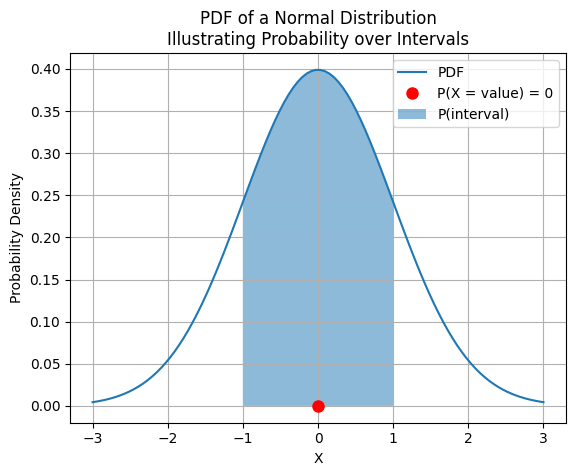

In [ ]:

import numpy as np
import matplotlib.pyplot as plt


mu = 0  # Mean
sigma = 1  # Standard deviation
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)

# Plot the PDF
plt.plot(x, pdf, label='PDF')

# Highlight the misconception: probability at a single point
specific_value = 0
plt.plot(specific_value, 0, 'ro', markersize=8, label='P(X = value) = 0')  # Probability at a single point is zero

# Show probability over an interval
interval_start = -1
interval_end = 1
plt.fill_between(x[(x >= interval_start) & (x <= interval_end)], 0, pdf[(x >= interval_start) & (x <= interval_end)], alpha=0.5, label='P(interval)')

plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('PDF of a Normal Distribution\nIllustrating Probability over Intervals')
plt.legend()
plt.grid(True)
plt.show()


# **5. A Common Misconception About Feature Scaling and Standardization**

**Feature Scaling** and **standardization** are common ways to alter a features range


*  **Min Max Scaler** shrinks the range to [0,1]
*   **Standardization** makes the mean zero and standard deviation one

It is desired because it prevents a specific feature from strongly influencing the model’s output. What’s more, it ensures that the model is more robust to variations in the data.

In the image above, the scale of Income could massively impact the overall prediction. Scaling (or standardizing) the data to a similar range can mitigate this and improve the model’s performance.

Yet, contrary to common belief, they NEVER change the underlying distribution.

Instead, they just alter the range of values.

Thus:

*  Normal distribution → stays Normal

*  Uniform distribution → stays Uniform

*  Skewed distribution → stays Skewed





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
#Generate a skewed dataset
shape = 2.0
scale = 2.0
size = 1000

#Generate the skewed dataset
skewed_data = np.random.gamma(shape,scale,size)

color_code = '#fe7c73'

colors = ['#fe7c73', '#2471A3', '#3498DB', '#27AE60', '#82E0AA', '#D35400', '#5D6D7E', '#E74C3C', '#21618C', '#B7950B', '#46C7C7', '#00B9FF', '#FF7051', "orange", "darkorange", "tomato", "coral", "limegreen", "lightsalmon"]

([<matplotlib.axis.XTick at 0x7c594a03ea10>,
 [Text(0, 0, '0'),
  Text(3, 0, '3'),
  Text(6, 0, '6'),
  Text(9, 0, '9'),
  Text(12, 0, '12'),
  Text(15, 0, '15')])

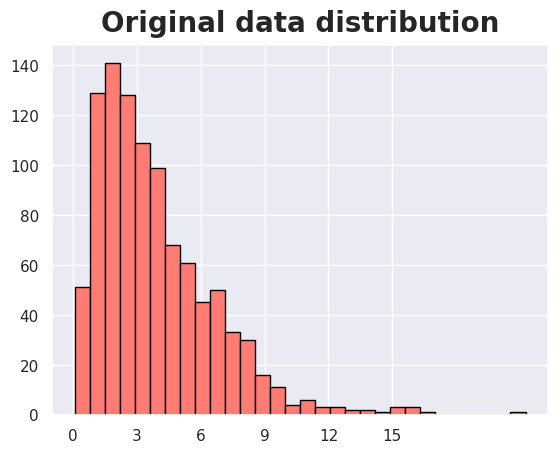

In [ ]:
plt.hist(skewed_data, bins=30, edgecolor='black',color=color_code)
plt.title("Original data distribution", fontsize=20,fontweight="bold",pad=10)
plt.xticks([0,3,6,9,12,15])


([<matplotlib.axis.XTick at 0x7c5945b66910>,
 [Text(-2, 0, '−2'),
  Text(-1, 0, '−1'),
  Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2')])

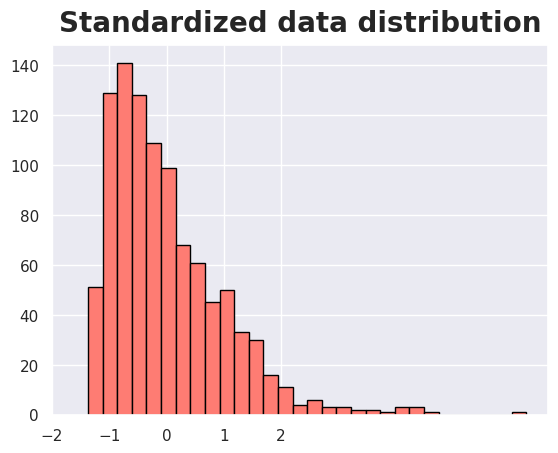

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(skewed_data.reshape(-1,1))

# Plot the histogram of the standardized dataset
plt.hist(standardized_data, bins=30, edgecolor='black', color =color_code)
plt.title("Standardized data distribution", fontsize=20,fontweight="bold",pad=10)
plt.xticks([-2,-1,0,1,2])



#**6. Random Forest May Not Need An Explicit Validation Set For Evaluation**



We all know that ML models should not be evaluated on the training data. Thus, we should always keep a held-out validation/test set for evaluation.

But random forests are an exception to that.

In other words, you can reliably evaluate a random forest using the training set itself.

Confused?

Let me explain.

To recap, a random forest is trained as follows:

*  First, create different subsets of data with replacement.

*  Next, train one decision tree per subset.

*  Finally, aggregate all predictions to get the final prediction.

Clearly, EVERY decision tree has some unseen data points in the entire training set.

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the data into training and testing sets (optional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate the model on the test set (optional)
y_pred = rf_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {test_accuracy}")


#Initialize one using OOB
rf_classifier_oob = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)
rf_classifier_oob.fit(X_train, y_train)

print(f"Test set accuracy using OOB: {rf_classifier_oob.oob_score_ }")


Test set accuracy: 0.9
Test set accuracy using OOB: 0.89


OOB (out-of-bag) score is a performance metric for a machine learning model, specifically for ensemble models such as random forests. It is calculated using the samples that are not used in the training of the model, which is called out-of-bag samples. These samples are used to provide an unbiased estimate of the model’s performance, which is known as the OOB score.

One of the main use cases of the OOB error is to evaluate the performance of an ensemble model, such as a random forest. Because the OOB error is calculated using out-of-bag samples, which are samples that are not used in the training of the model, it provides an unbiased estimate of the model’s performance.

Another use case of the OOB error is to tune the hyperparameters of a model. By using the OOB error as a performance metric, the hyperparameters of the model can be adjusted to improve its performance on unseen data.

Additionally, the OOB error can be used to diagnose whether a model is overfitting or underfitting. If the OOB error is significantly higher than the validation score, it may indicate that the model is overfitting and not generalizing well to unseen data. On the other hand, if the OOB error is significantly lower than the validation score, it may indicate that the model is underfitting and not learning the underlying patterns in the data.

Overall, the OOB error is a useful tool for evaluating the performance of an ensemble model and for diagnosing issues such as overfitting and underfitting.


#**7. A Visual and Overly Simplified Guide To Bagging and Boosting**

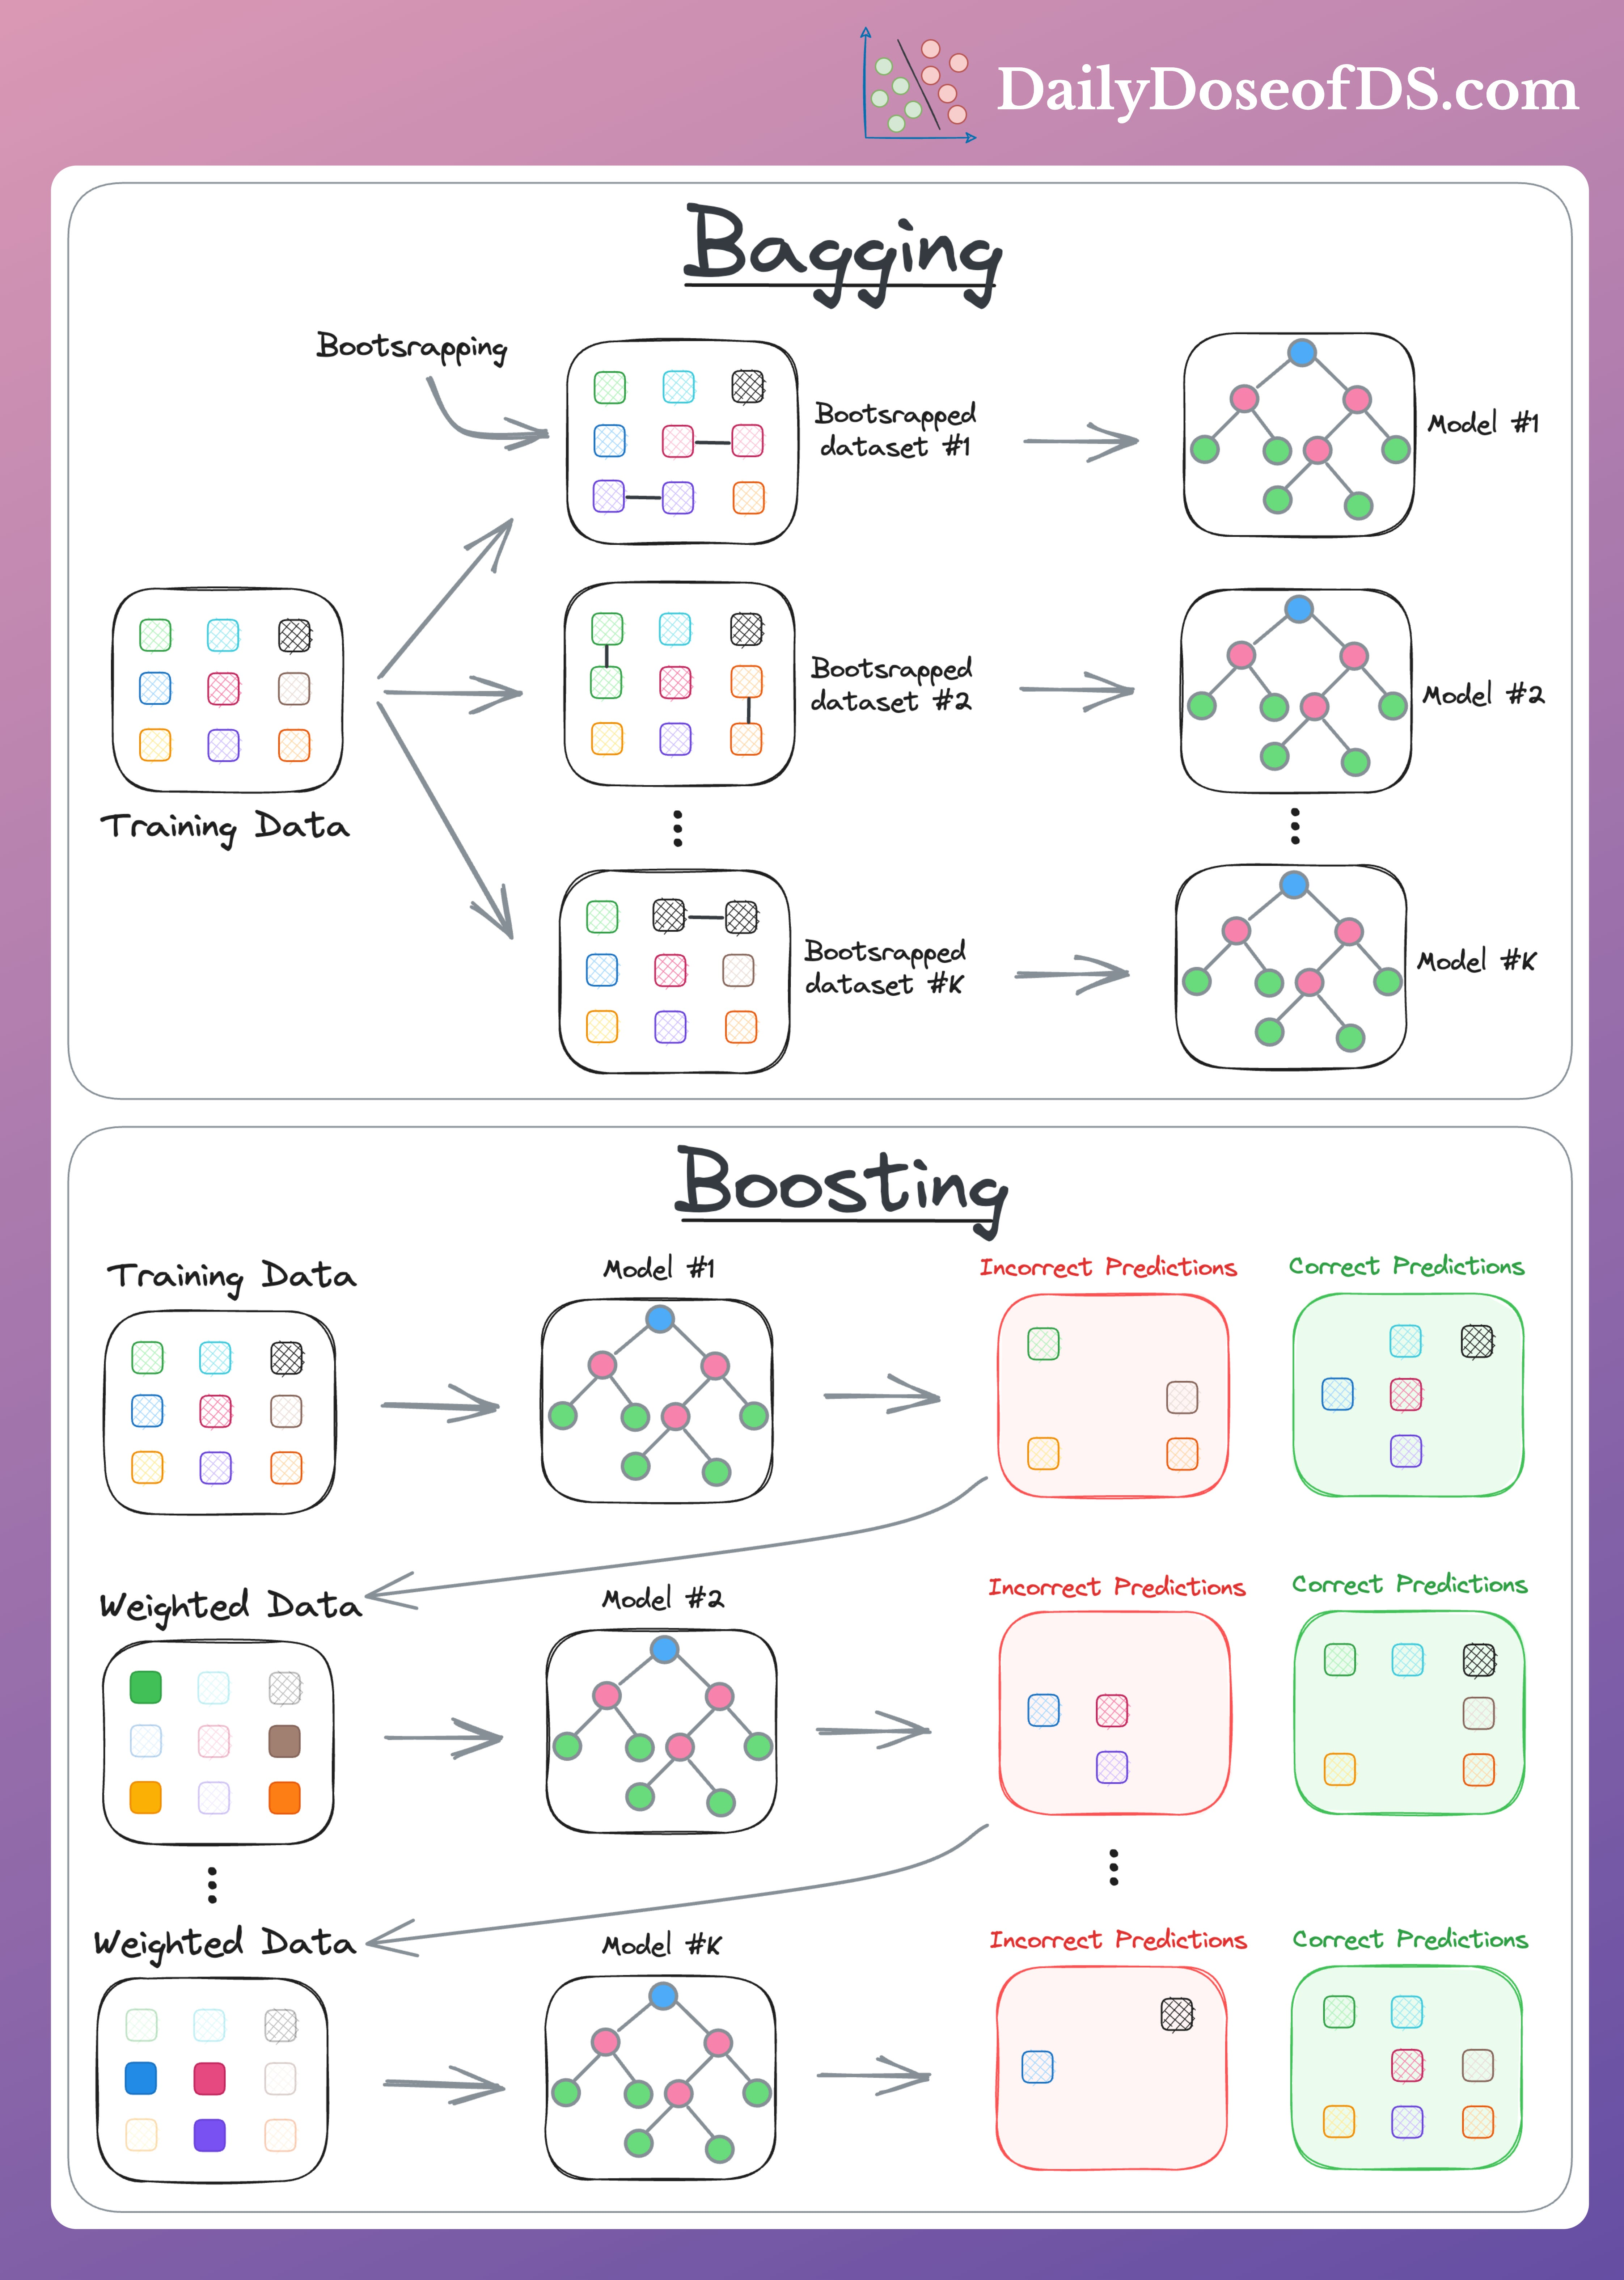

**Bagging (Bootstrap Aggregating)**

  Train multiple independent base learners (typically the same algorithm, like decision trees) on different random subsets of the training data. These subsets are created using sampling with replacement (bootstrapping). The final prediction is obtained by aggregating the predictions of all the base learners (e.g., by averaging for regression or majority voting for classification).

Primarily aims to reduce variance and improve the stability of the model. By training on different subsets, each learner captures slightly different aspects of the data, and averaging their predictions reduces the impact of noise and outliers present in individual subsets


**Boosting**

  Train multiple base learners sequentially, where each new learner tries to correct the errors made by the previous learners. It assigns weights to the training instances, giving more weight to the instances that were misclassified by the earlier learners. The final prediction is obtained by a weighted combination of the predictions of all the base learners.  

  Train multiple base learners sequentially, where each new learner tries to correct the errors made by the previous learners. It assigns weights to the training instances, giving more weight to the instances that were misclassified by the earlier learners. The final prediction is obtained by a weighted combination of the predictions of all the base learners

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score

#Generate synthetic dataset
X, y = make_classification(n_samples=1000,n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

#Bagging Algorithm -- reduces variance
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=10,random_state=42)
bagging_model.fit(X_train,y_train)
bagging_predictions = bagging_model.predict(X_test)
bagging_accuracy = accuracy_score(y_test,bagging_predictions)
print("Bagging (Random Forest) Accuracy:", bagging_accuracy)


#Boosting  -- reduces bias
boosting_model = AdaBoostClassifier(n_estimators=50,random_state=42)
boosting_model.fit(X_train,y_train)
boosting_predictions = boosting_model.predict(X_test)
boosting_accuracy = accuracy_score(y_test,boosting_predictions)
print("Boosting (AdaBoost) Accuracy:", boosting_accuracy)


bagging_roc_auc = roc_auc_score(y_test, bagging_model.predict_proba(X_test)[:, 1])
boosting_roc_auc = roc_auc_score(y_test, boosting_model.predict_proba(X_test)[:, 1])
print("Bagging ROC AUC:", bagging_roc_auc)
print("Boosting ROC AUC:", boosting_roc_auc)

Bagging (Random Forest) Accuracy: 0.885
Boosting (AdaBoost) Accuracy: 0.875
Bagging ROC AUC: 0.9287006331022007
Boosting ROC AUC: 0.9196060697417345



| Feature             | Bagging                                     | Boosting                                          |
|----------------------|---------------------------------------------|---------------------------------------------------|
| **Base Learners** | Typically the same algorithm                | Typically the same algorithm                      |
| **Training Data** | Independent random subsets (with replacement) | Weighted subsets based on previous learner's errors |
| **Learner Order** | Independent (can be trained in parallel)    | Sequential (each learner depends on the previous) |
| **Learner Weight** | Typically equal (e.g., simple averaging/voting) | Weighted based on learner performance            |
| **Primary Goal** | Reduce variance, improve stability          | Reduce bias, improve accuracy                     |
| **Sensitivity to Noise** | Less sensitive (due to independent training) | More sensitive (can overfit to noisy data)       |
| **Complexity** | Generally simpler to implement               | Can be more complex to implement and tune          |
| **Examples** | Random Forest                               | AdaBoost, GBM, XGBoost, LightGBM, CatBoost        |

# **8.10 Most Common (and Must-Know) Loss Functions in ML**

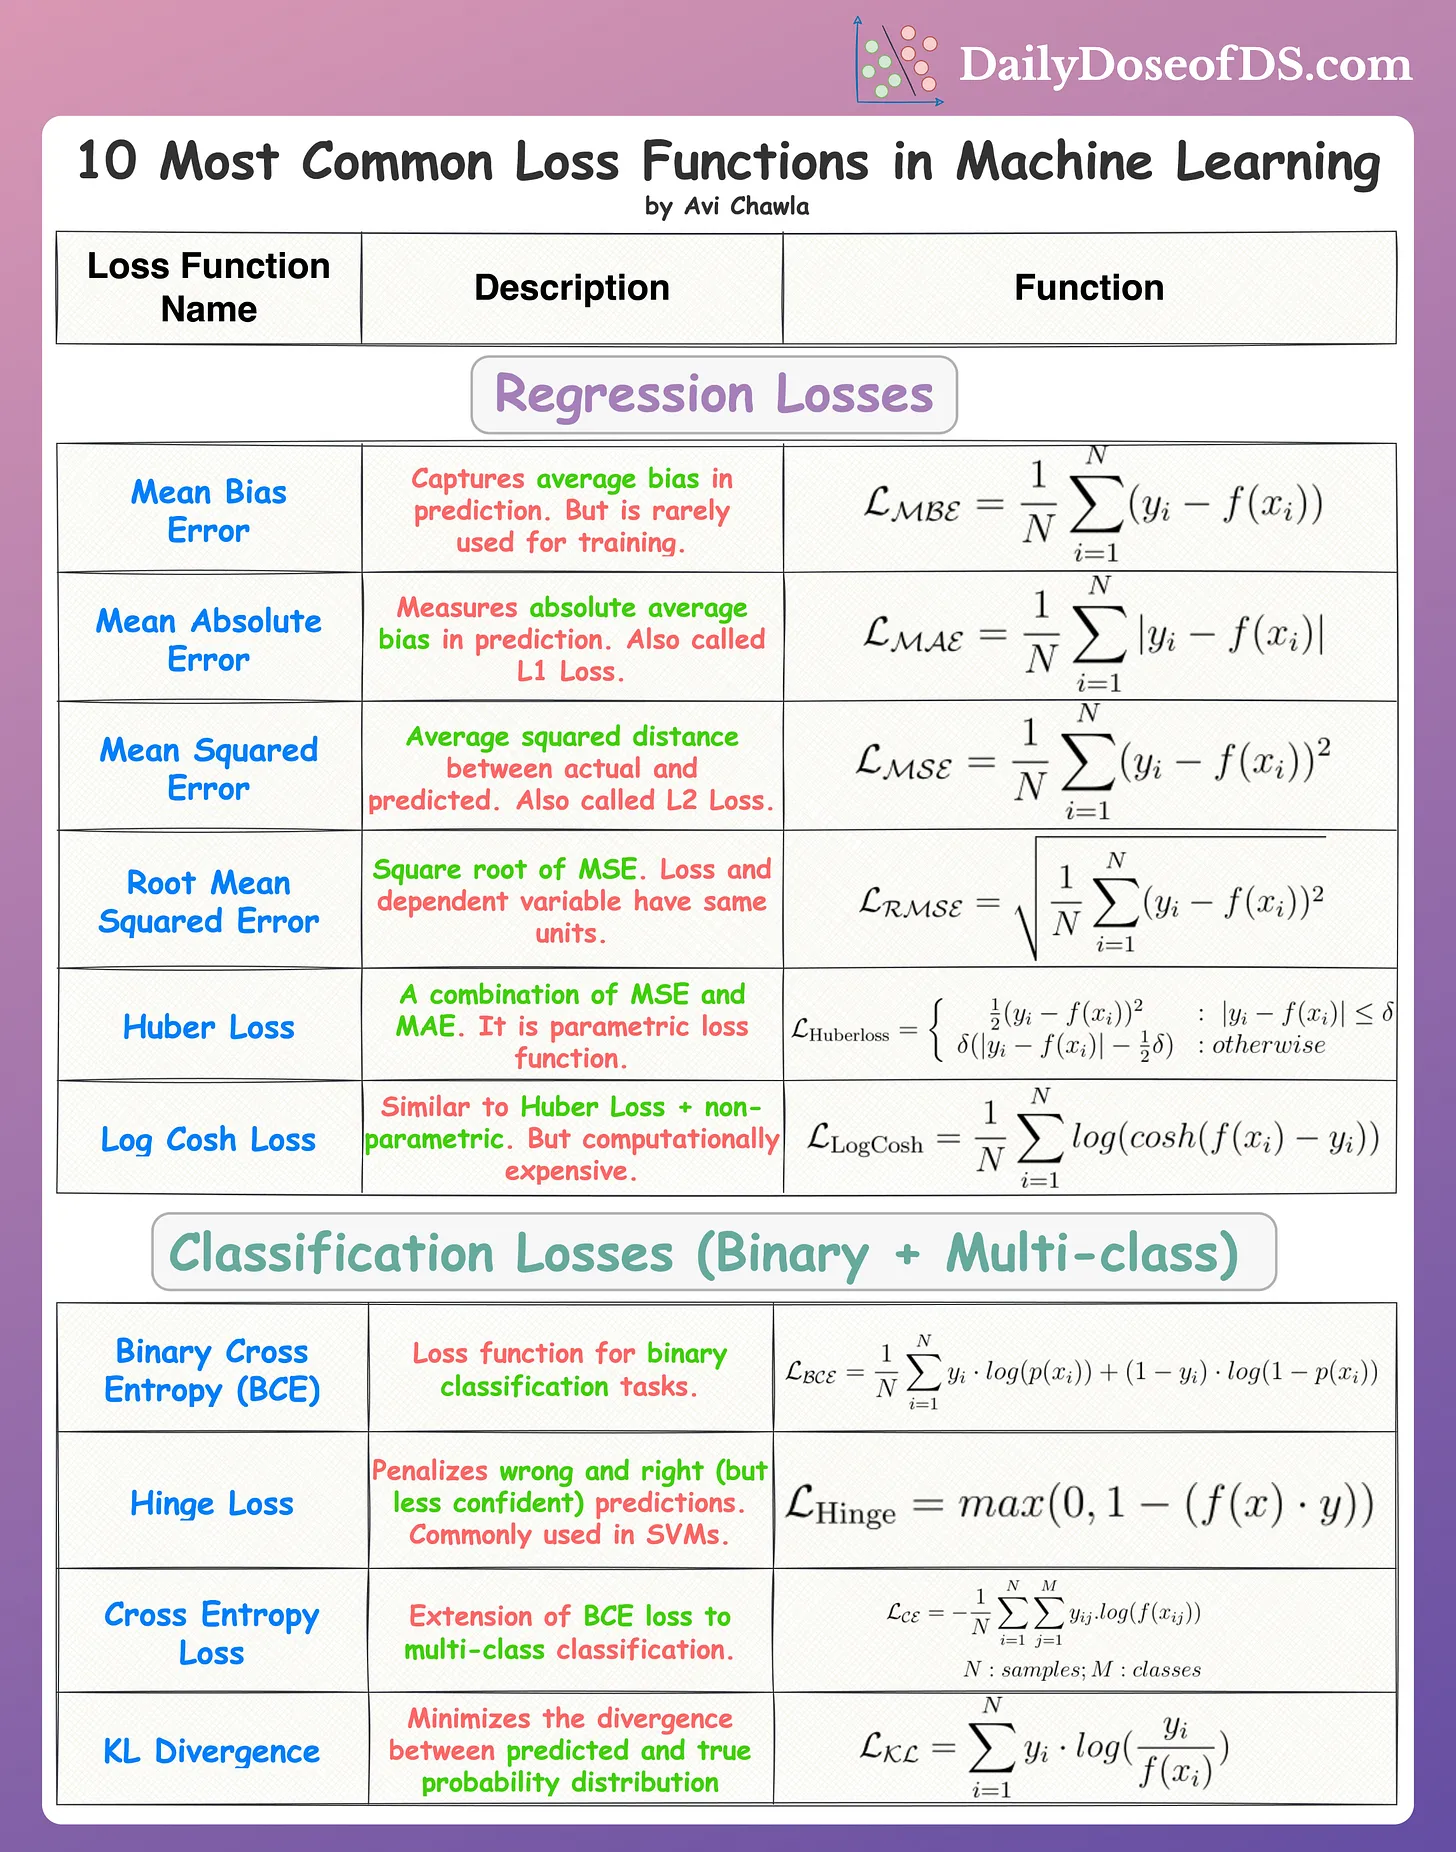

You can read the rest of the doc [here](https://blog.dailydoseofds.com/p/10-most-common-and-must-know-loss)

**Bias** - This is the error introduced by the oversimplification of the assumptions made by a model.

**Variance** - This is the model's sensitivity to fluctuations in data

##**Regression**

1.   **Mean Bias Error** -> Captures the average bias in predictions. It is rarely used because the negative errors might cancel out positive errors leading to zero loss and consequentially, no model weight updates
2.   **Mean Absolute Error** -> L1 Loss and captures the average absolute differences between the predicted and actual values thus making positive and negative values not cancel each other out. One caveat is that small errors are as important as big ones. Thus, the magnitude of the gradient is independent of error size
3.   **Mean Squared Error** -> Measures the squared difference between predicted and actual value. Also called L2 Loss. Large errors might significantly contribute to smaller errors making it sensitive to outliers

When choosing between the two:


1.   **Outlier Sensitivity** - MAE is robust to outliers while MSE is sensitive
2.   **Mathematical properties** - MSE is differentiable making it more convenient for optimization
3.   **Interpretability** - MAE is easier to interpret
4.   **Error Penalization** - MSE penalizes large errors more heavily

let's continue...
4.   **Root Mean Squared Error** -> RMSE is essentially the square root of MSE. It provides a measure of the average magnitude of the errors in the same units as the target variable, making it easier to understand..Use MSE when you primarily care about the mathematical properties of the error metric, especially during model optimization.Use RMSE when you want a more interpretable error metric that's in the same units as your target variable. RMSE is also very commonly used in reporting model performance

5.   **Huber Loss** -> Combination of MSE and MAE function. It is a parametric loss function

#**Classification**

1.  **Binary Cross Entropy**-> Measures the dissimilarity between predicted probabilities and true binary labels, through the logarithmic loss.
2.   **Hinge Loss** -> Penalizes both wrong and right (but less confident) predictions). It is based on the concept of margin, which represents the distance between a data point and the decision boundary. The larger the margin, the more confident the classifier is about its prediction. Particularly used to train Support Vector Machines (SVMs).
3.  **Cross Entropy Loss** ->  An extension of Binary Cross Entropy loss to multi-class classification tasks.
5.  **KL Divergence** -> It minimizes the divergence between predicted and true probability distribution. For classification, using KL divergence is the same as minimizing cross entropy.Thus, it is recommended to use cross-entropy loss because of the ease of computation.


#**9. Theil Sen Regression vs Linear Regression (Ordinary Least Squares)**

**OLS** aims to find the "best-fitting" line by minimizing the sum of the squared differences between the observed values and the predicted values.
This method is highly sensitive to outliers. A single outlier can significantly pull the regression line away from the true underlying trend.

Strengths:

*   Efficient and widely used when data is normally distributed and free of significant outliers.
*   Provides well-established statistical properties

**Theil Sen Regression** is a robust method. It calculates the median of the slopes between all pairs of data points.

Strengths:

*   Robust to outliers. It can handle data with a high proportion of outliers without significantly affecting the regression line
*   Non-parametric, meaning it doesn't rely on assumptions about the distribution of the data

It works as follows:

*   Pairs of Dots: It takes every possible pair of dots from your data.
*   Calculate Slopes: For each pair of dots, it calculates the slope of the line that connects them.
*   Find the Median: It then finds the middle slope among all the slopes it calculated. This "middle" slope is called the median.
*   The Theil-Sen regression line is the line that has this median slope. It also finds a "middle" point (median of the x-values and y-values) to pass this median slope through.

The final weights are the spatial median (or L1 Median) of all models. The spatial median represents the “middle” or central location in a multidimensional space.Essentially, the objective is to **find a point in the same multidimensional space which minimizes the sum of the absolute differences between itself and all other points (weight vectors, in this case)**




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression , TheilSenRegressor

Text(0.5, 1.0, 'Random Plot')

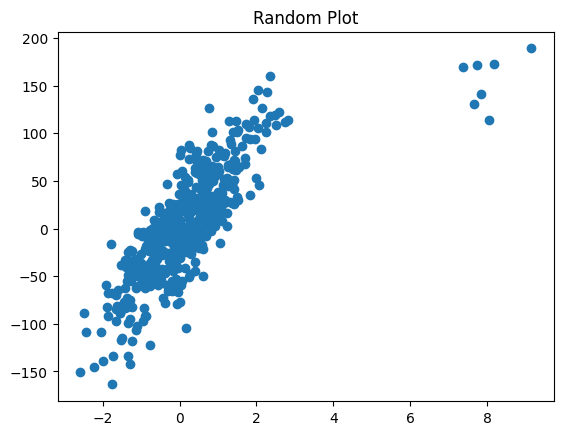

In [ ]:
N_SAMPLES = 500
N_OUTLIERS = 7

X, y ,coef = datasets.make_regression(
    n_samples=N_SAMPLES,
    n_features=1,
    n_informative=1,
    noise=30,
    coef = True,

)

coef_list = [["original_coef",float(coef)]]

#Adding outliers
outliers_x = 8+0.75*np.random.normal(size=(N_OUTLIERS ,1))
outliers_y = 150 + 20*np.random.normal(size=(N_OUTLIERS))

X = np.concatenate((X,outliers_x))
y = np.concatenate((y,outliers_y))

plt.scatter(X,y)
plt.title("Random Plot")

In [ ]:
lr = LinearRegression().fit(X,y)
coef_list.append(["linear_regression",lr.coef_[0]])

plotline_X = np.arange(X.min(), X.max()).reshape(-1, 1)

fit_df = pd.DataFrame(
    index = plotline_X.flatten(),
    data={"linear_regression": lr.predict(plotline_X)}
)
colors = ['#fe7c73', '#2471A3', '#3498DB', '#27AE60',
          '#82E0AA', '#D35400', '#5D6D7E', '#E74C3C',
          '#21618C', '#B7950B', '#46C7C7', '#00B9FF',
          '#FF7051', "orange", "darkorange", "tomato",
          "coral", "limegreen", "lightsalmon"]


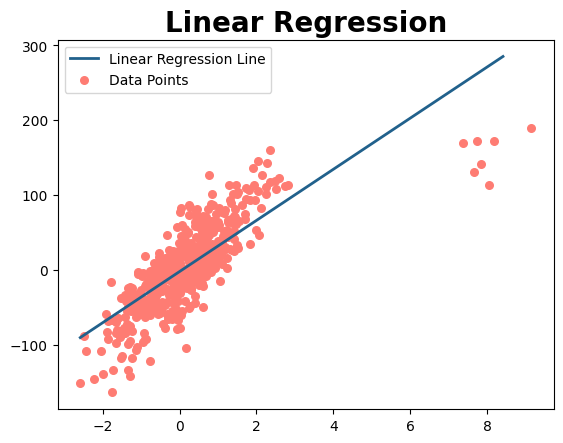

In [ ]:
fix , ax = plt.subplots()
fit_df.plot(ax=ax,y="linear_regression",c=colors[8],lw=2,label="Linear Regression Line")
plt.scatter(X,y,c=colors[0],s=30,label="Data Points")
plt.legend()
plt.title("Linear Regression",fontsize=20,fontweight="bold")
plt.show()

In [ ]:
theilsen = TheilSenRegressor(random_state=42).fit(X,y)
fit_df["theilsen_regression"] = theilsen.predict(plotline_X)
coef_list.append(["theilsen_regression",theilsen.coef_[0]])


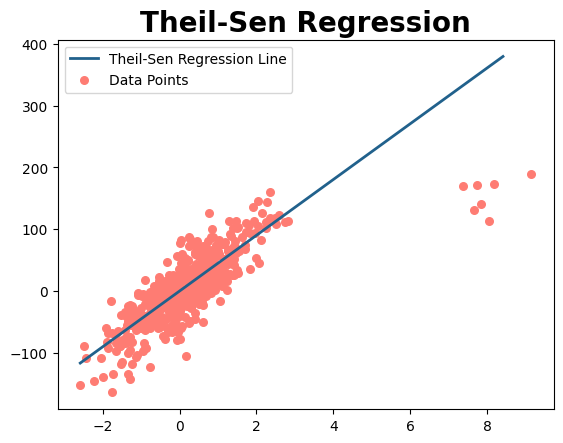

In [ ]:
fix, ax = plt.subplots()
fit_df.plot(ax=ax, y = "theilsen_regression", c = colors[8], lw=2, label="Theil-Sen Regression Line")
plt.scatter(X, y, c = colors[0], s = 30, label = "Data Points")
plt.legend()
plt.title("Theil-Sen Regression", fontsize=20, fontweight = "bold")

plt.show();



# **10.The Limitations Of Elbow Curve And What You Should Replace It With**

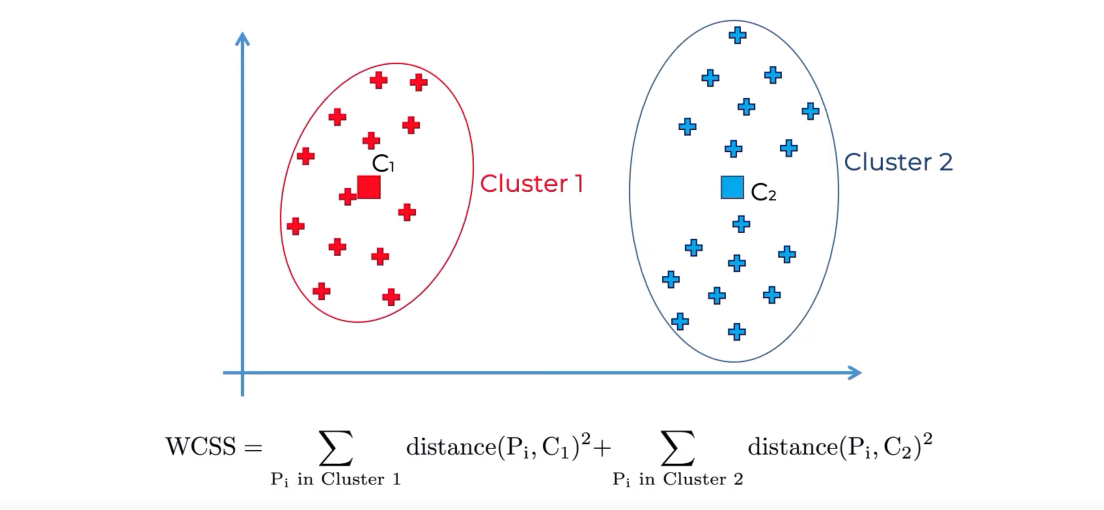

We commonly use the Elbow curve to determine the number of clusters (k) for KMeans. It basically looks at the distance between each point and the centroid , square them and add them up. However the elbow curve has particular concerns:

*   It has a subjective interpretation
*   involves ambiguity in determining the Elbow point accurately
*   only considers a within-cluster distance

Silhouette score is an alternative measure used to evaluate clustering quality.It is computed as follows:

*   For every data point (i), find:
     *    (i): average distance to every other data point within the cluster
     *    b(i): average distance to every data point in the nearest cluster.
*   The silhouette score (s) for a single data point is calculated as:

    s = (b - a) / max(a, b)

Some properties of Silhoutte score inculde:


*   it ranges from [-1,1]
*   a higher score indicates better clustering
*   it can be used as an evaluation metric for clustering in the absence of ground truth labels

In contrast to the Elbow curve, the Silhouette score:
*   provides a quantitative (and objective) measure hence no ambiguity
*   considers BOTH within-cluster and between-cluster distance



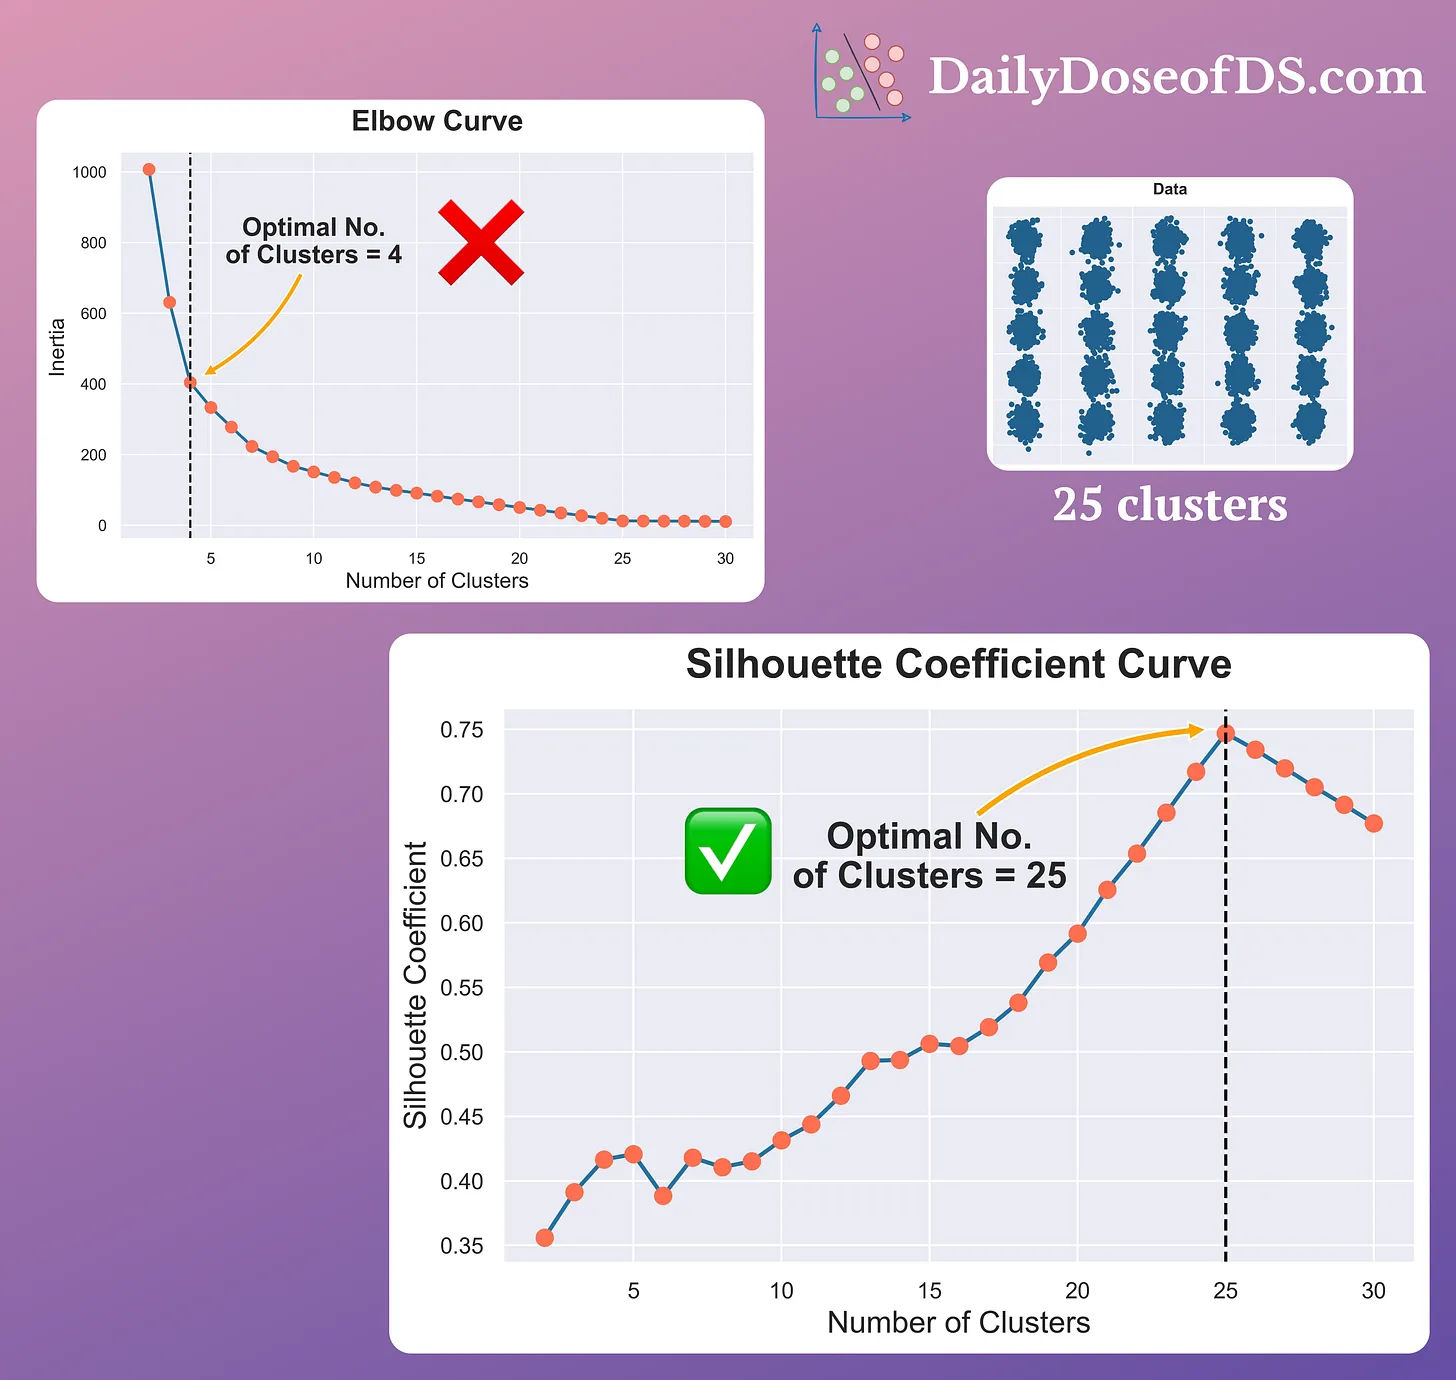

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import seaborn as sns
sns.set()

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/gittar/breathing-k-means/master/data/gmd5x5.csv", names = ["X1", "X2"])
df.head(4)

,X1,X2
0,0.111664,0.090023
1,0.085615,0.106970
2,0.114612,0.020423
3,0.075775,0.136066


In [5]:
colors = ['#fe7c73', '#2471A3', '#3498DB', '#27AE60', '#82E0AA', '#D35400', '#5D6D7E', '#E74C3C', '#21618C', '#B7950B', '#46C7C7', '#00B9FF', '#FF7051', "orange", "darkorange", "tomato", "coral", "limegreen", "lightsalmon"]

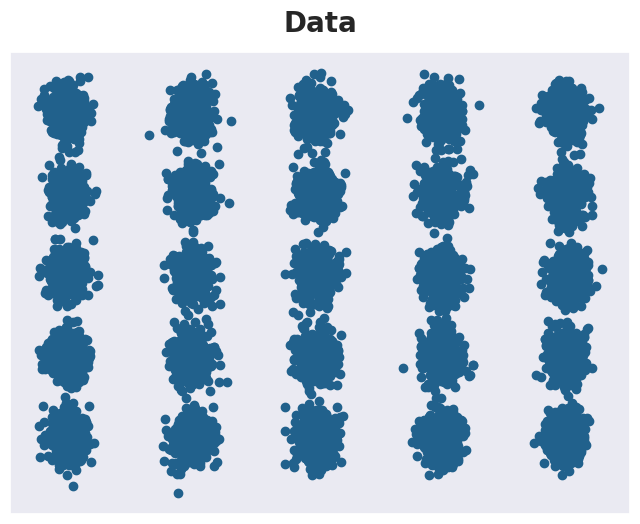

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(df.X1, df.X2, c=colors[8])
ax.set_title("Data",fontsize = 20, fontweight="bold",pad=15)

ax.set_xlabel(None)
ax.set_ylabel(None)

ax.set_xticks([])
ax.set_yticks([])
plt.show()



In [11]:
X = df.values

In [12]:
# Initialize empty lists to store the inertia (WCSS) and silhouette coefficient
inertia = []
silhoutte_scores = []

#Define the range of clusters to test
cluster_range = range(2,31)

#Perform clustering and calculate inertia and silhouette coefficient for each cluster number
for num_clusters in cluster_range:
  kmeans = KMeans(n_clusters=num_clusters,random_state=42)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)
  silhoutte_scores.append(silhouette_score(X,kmeans.labels_))

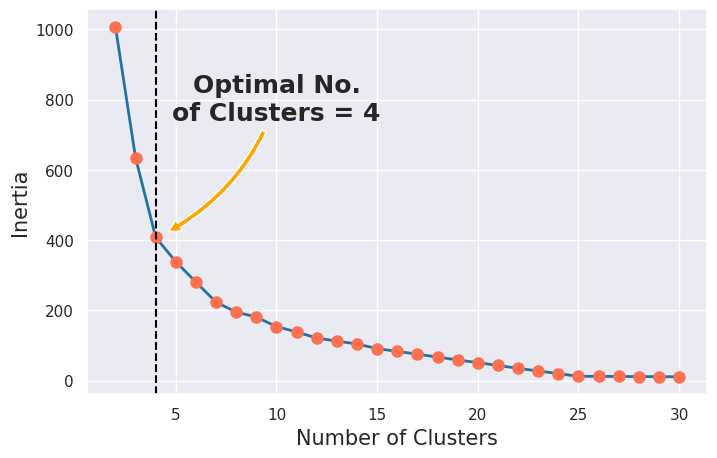

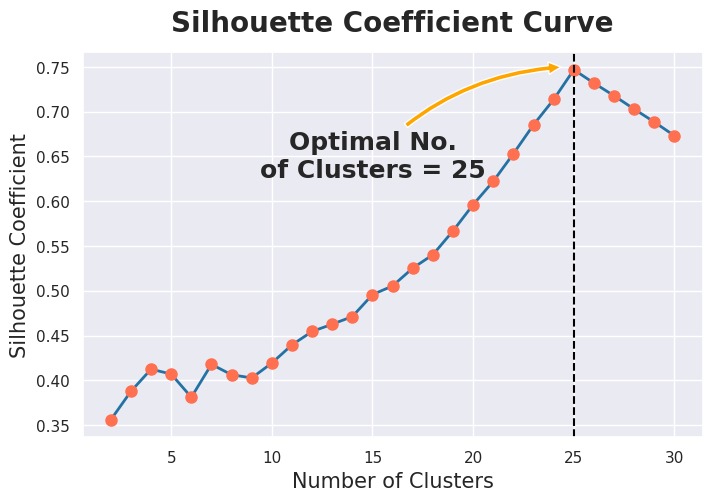

In [15]:


# Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', markersize=0, lw=2, c = colors[1])
plt.plot(cluster_range, inertia, marker='o', markersize=8, lw = 0, color=colors[12])
plt.axvline(x=4, linestyle='--', color='black')
plt.xlabel('Number of Clusters', fontsize = 15)
plt.ylabel('Inertia', fontsize = 15)

plt.annotate("Optimal No.\nof Clusters = 4", (4.5, 420), (10,800), size=18, fontweight = "bold", va="center", ha="center",
            arrowprops=dict(arrowstyle="simple", facecolor='orange',
                            connectionstyle="arc3,rad=-0.2"))

plt.savefig("kmeans_clusters_elbow.jpeg", dpi=600, bbox_inches = "tight")
plt.show()

# Plotting the silhouette coefficient curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhoutte_scores, marker='o', markersize=0, lw=2, c = colors[1])
plt.plot(cluster_range, silhoutte_scores, marker='o', markersize=8, lw = 0, color=colors[12])
plt.axvline(x=25, linestyle='--', color='black')
plt.xlabel('Number of Clusters', fontsize = 15)
plt.ylabel('Silhouette Coefficient', fontsize = 15)
plt.title('Silhouette Coefficient Curve', fontsize = 20, fontweight="bold", pad = 15)

plt.annotate("Optimal No.\nof Clusters = 25", (24.5, 0.75), (15,0.65), size=18, fontweight = "bold", va="center", ha="center",
            arrowprops=dict(arrowstyle="simple", facecolor='orange',
                            connectionstyle="arc3,rad=-0.2"))


plt.show()

